# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score


# Loading dataset


In [2]:

churn = pd.read_csv('Churn_Modelling.csv')


# Data Preprocessing


In [3]:

churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
churn = pd.get_dummies(churn, columns=['Geography', 'Gender'], drop_first=True)


# Spliting data


In [4]:

X = churn.drop('Exited', axis=1)
y = churn['Exited']


# Spliting data into training and testing sets


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model Selection and Optimization (Random Forest)


In [6]:

rf_classifier = RandomForestClassifier(random_state=42)


# Hyperparameter tuning using GridSearchCV


In [7]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_classifier = grid_search.best_estimator_


# Model Training and Evaluation


In [8]:

best_rf_classifier.fit(X_train, y_train)
y_pred = best_rf_classifier.predict(X_test)


# Model Evaluation


In [9]:

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Print results


In [10]:

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("F1 Score: {:.2f}".format(f1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 86.80%
F1 Score: 0.57

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.45      0.57       584

    accuracy                           0.87      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000


Confusion Matrix:
[[2339   77]
 [ 319  265]]


# Visualizations


Text(0.5, 1.0, 'Confusion Matrix')

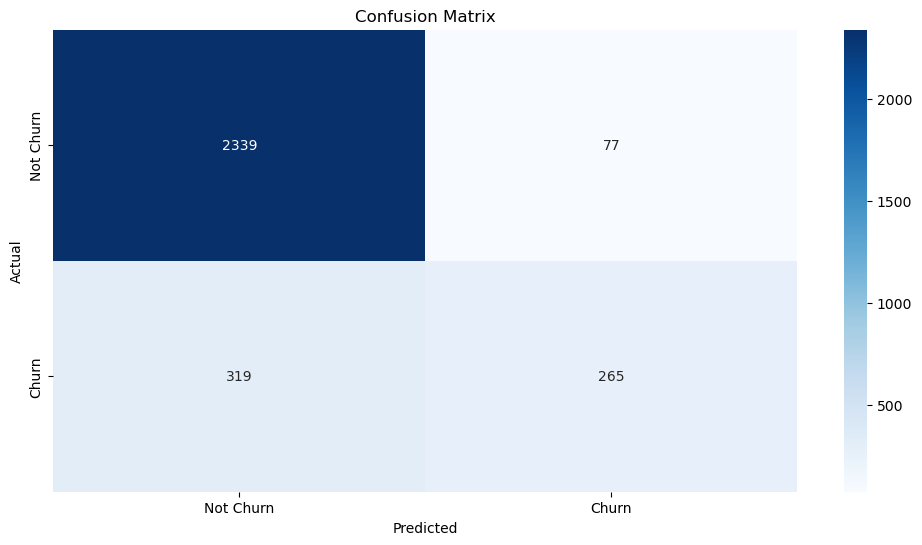

In [11]:

plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


# Feature Importance Plot


Text(0.5, 1.0, 'Feature Importance Plot')

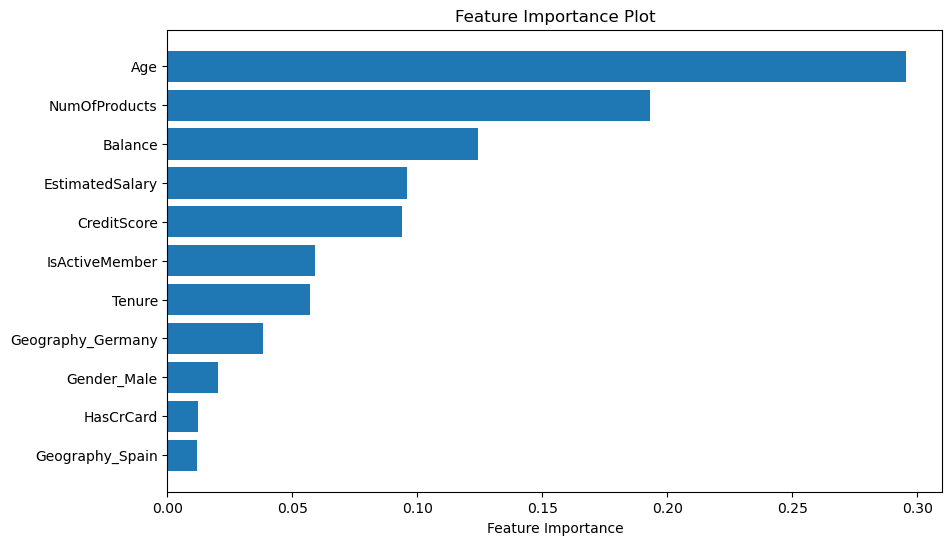

In [12]:

feature_importance = best_rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importance)
top_features = X.columns[sorted_idx]
top_feature_importance = feature_importance[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), top_feature_importance, align="center")
plt.yticks(range(X.shape[1]), top_features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')


# ROC Curve and AUC


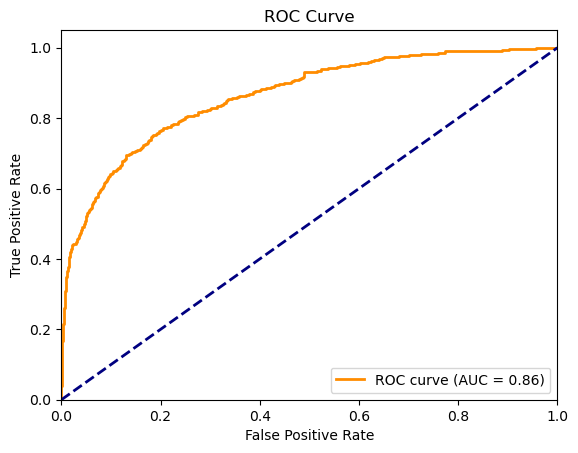

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')


# Precision-Recall Curve


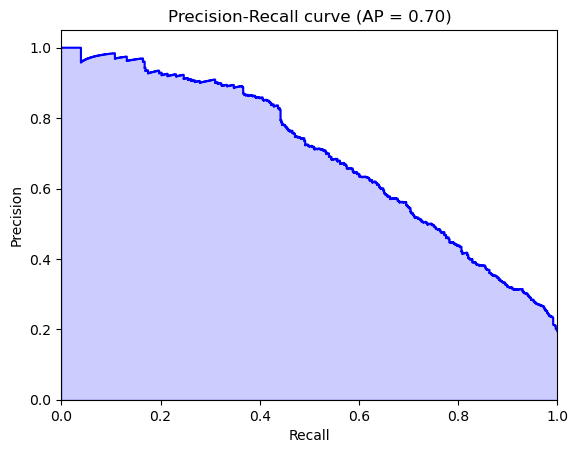

In [14]:

precision, recall, _ = precision_recall_curve(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test, best_rf_classifier.predict_proba(X_test)[:, 1])

plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve (AP = {:.2f})'.format(average_precision))

plt.show()

# Distribution Plots for Numerical Features:


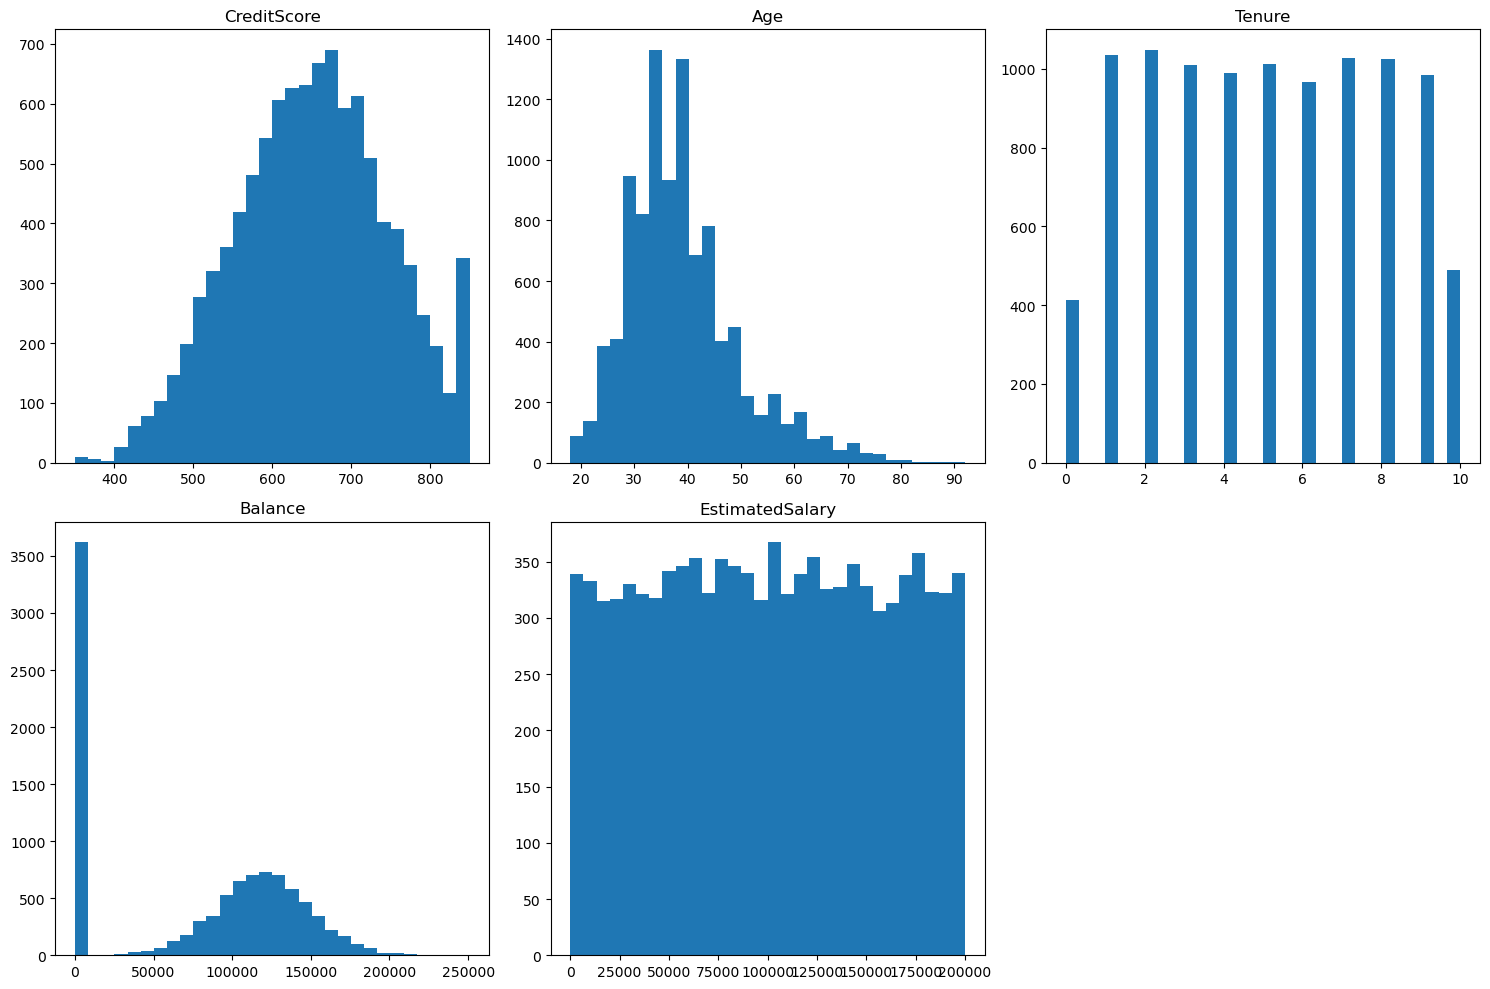

In [20]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    plt.hist(churn[feature], bins=30)
    plt.title(feature)
plt.tight_layout()
plt.show()